### <strong>Goal</strong>: It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
#Run mutliple outputs on one code chunck
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [48]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

### Load Data

In [3]:
train_df = pd.read_csv(r'../data/raw/train.csv')
test_df = pd.read_csv(r'../data/raw/test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA

In [4]:
train_df.shape
train_df.shape[1]/train_df.shape[0]

(1460, 81)

0.05547945205479452

Large number of features ~ 5% of rows. May need to explore dimension reduction 

#### Missing Values Check

<Figure size 2000x500 with 0 Axes>

Text(0.5, 1.0, 'Heatmap of missing values in data')

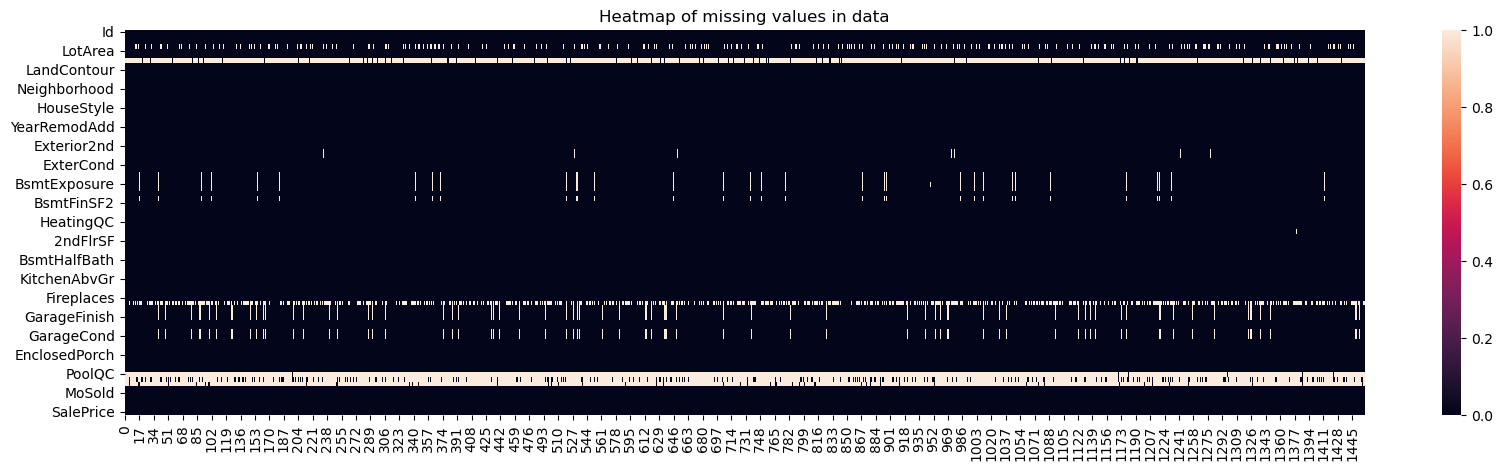

In [5]:
plt.figure(figsize=(20,5))
sns.heatmap(train_df.isna().transpose()).set_title('Heatmap of missing values in data')

<AxesSubplot:xlabel='Null_percentage', ylabel='Count'>

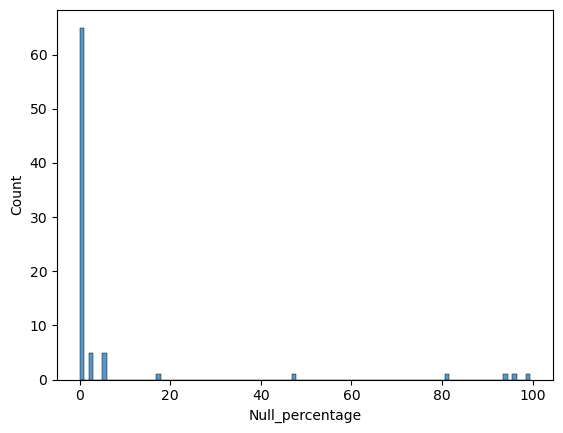

In [6]:
null_df = train_df.isna().sum().reset_index()  
null_df.columns = ['Features', 'Null_count']
null_df['Null_percentage'] = (null_df['Null_count']/train_df.shape[0])*100
sns.histplot(null_df['Null_percentage'], bins=100)
plt.show()

In [7]:
null_df = null_df[null_df['Null_percentage']>0].sort_values(by = 'Null_percentage', ascending= False).reset_index(drop=True)
null_df

,Features,Null_count,Null_percentage
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,FireplaceQu,690,47.260274
5,LotFrontage,259,17.739726
6,GarageType,81,5.547945
7,GarageYrBlt,81,5.547945
8,GarageFinish,81,5.547945
9,GarageQual,81,5.547945


After inspecting features with missing values in data description, most NA values can be interpreted as valid datapoints (I.e. NA in Alley refers to no alley access). <br>
Below is the method/value that each missing value for all feauture will be imputed: <br>
- PoolQC: N/A as datapoint
- MiscFeature: N/A as datapoint
- Alley: N/A as datapoint
- Fence: N/A as datapoint
- FireplaceQu: N/A as datapoint
- LotFrontage: (mean imputation). 0 could also be valid?
- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond: If all are the same rows then N/A as datapoint Else drop
- BsmtQual BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: N/A as datapoint
- MasVnrArea: (mean imputation)
- MasVnrType: (mode/smote impute)
- Electrical: DROP row <br>

May consider removing features if model performance is poor: <br>
- PoolQC, MiscFeatures, Alley and Fence as there is a lot of missing values hence adding noise to model <br>


In [75]:
train_df_v2 = train_df.copy()

# Rows dropped
train_df_v2.dropna(subset = 'Electrical', axis=0, inplace=True)

# Rows dropped only if all missing
train_df_v2.dropna(subset=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], axis = 0, how= 'all', inplace= True)

# Numerical Features Imputed
train_df_v2['LotFrontage'].fillna(value= train_df_v2['LotFrontage'].mean(), inplace=True)
train_df_v2['MasVnrArea'].fillna(value= train_df_v2['MasVnrArea'].mean(), inplace=True)

# Categrical Features Imputed
train_df_v2.fillna(value= 'N/A', inplace = True)

# Check missing values
train_df_v2.isna().sum()

train_df_v2.reset_index(inplace=True, drop=True)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

#### Datatypes

In [9]:
train_df_v2.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [76]:
# Extract/Convert numeric features
numeric_features = train_df_v2.select_dtypes(include="number").columns
numeric_features = numeric_features.drop(labels="Id")

# Extract/Convert categorical features
categorical_features = train_df_v2.select_dtypes(include='object').columns
for feature in categorical_features:
    train_df_v2[feature] = train_df_v2[feature].astype('category')

#### Duplicates

In [72]:
# Duplicated rows
duplicate_rows = train_df_v2.duplicated(train_df_v2.columns.difference(['Id']))
print(f"Number of duplicated rows: {train_df_v2[duplicate_rows].shape[0]}")

# Duplicated columns
duplicate_cols = train_df_v2.T.duplicated()
print(f"Number of duplicated columns: {print(train_df_v2.loc[:, duplicate_cols].shape[1])}")


Number of duplicated rows: 0
0
Number of duplicated columns: None


#### Collinearity

In [25]:
corr_matrix = train_df_v2.corr()

<Figure size 2000x1500 with 0 Axes>

<AxesSubplot:>

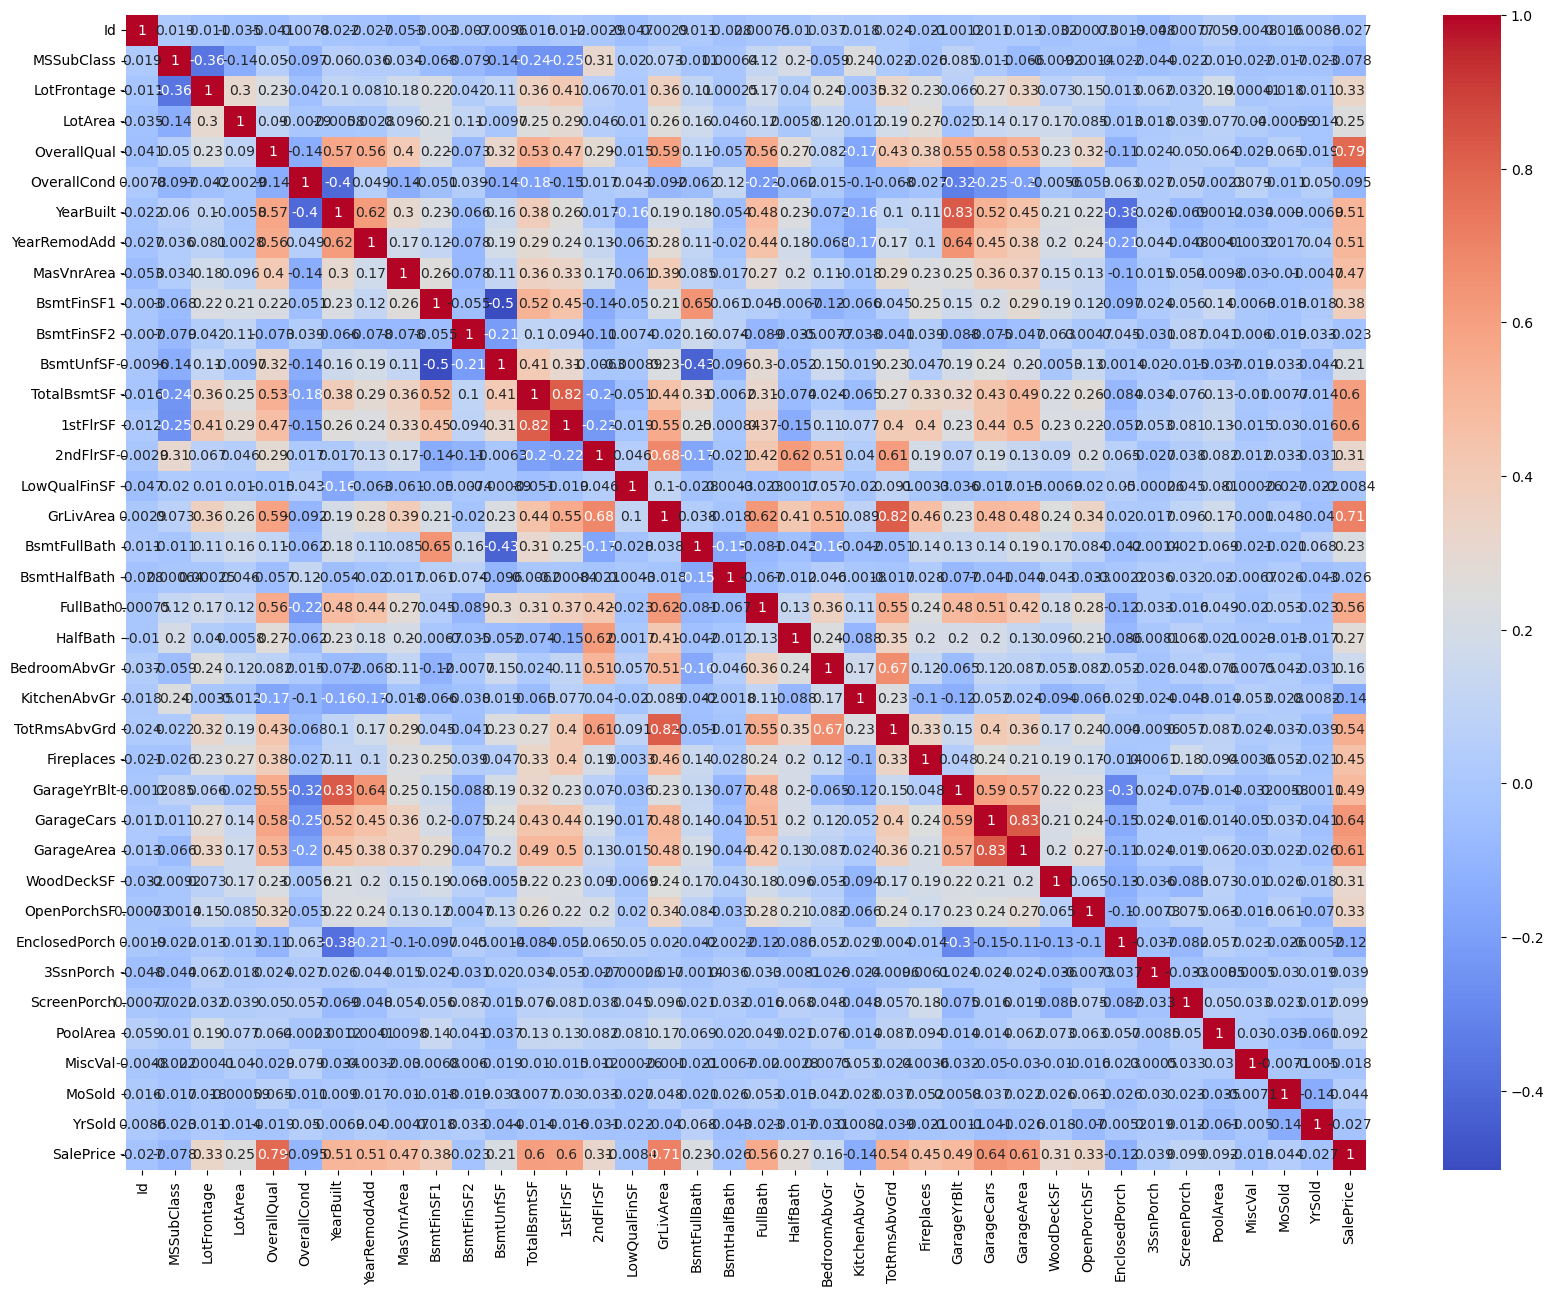

In [34]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Not concerned about collinearity of features. If model has low performance, may consider removing GarageYrBuilt as hghly correlated with Yearbuilt feature & TotRmsAbvGrd as highly correlated with GrLivArea

#### Scale and Centre Numeric Features <br>

In [78]:
# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the numerical features
scaler.fit(train_df_v2[numeric_features])

# transform the numerical features using the scaler
train_df_v2[numeric_features] = scaler.transform(train_df_v2[numeric_features])

StandardScaler()

#### Re-encode categorical features

In [82]:
# create a OneHotEncoder object
encoder = OneHotEncoder()

# fit the encoder to the categorical features
encoder.fit(train_df_v2[categorical_features])

# transform the categorical features using the encoder
encoded = encoder.transform(train_df_v2[categorical_features]).toarray()

# create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))

# concatenate the encoded features with the numerical features
train_df_v3 = pd.concat([train_df_v2['Id'], train_df_v2[numeric_features],encoded_df], axis=1)

OneHotEncoder()